# Capstone 3 - Customer Churn Prediction for Telco

In the previous [Notebook](https://github.com/dvanheeswijk/Springboard/blob/master/Capstone_3/Capstone%203%20-%20Data%20Wrangling.ipynb), we looked into the Telco customer churn data, cleaning and changing the data as necessary in order to prepare for our next phase. Here, we will now explore the data and look to find out as much as we can from the data. For this purpose, we will refer to our original data, found in *Telco_customer_churn.xlsx*, as well as our clean data, *clean_data.csv*.

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [82]:
df_churn = pd.read_excel('data/Telco_customer_churn.xlsx')
df_clean = pd.read_csv('data/clean_data.csv')

### Exploring the Data

We will start our exploration using the previously uncleaned data, in order to see how the data looks with regards to the labels associated with each category.

In [83]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

#### Analysis of location and churn

In [84]:
df_city = df_churn.groupby('City')['Churn Value'].sum().sort_values(ascending=False).head(10)

df_city = pd.DataFrame(df_city, index=None)
df_city.reset_index(inplace=True)
df_city

,City,Churn Value
0,Los Angeles,90
1,San Diego,50
2,San Francisco,31
3,San Jose,29
4,Sacramento,26
5,Fresno,16
6,Long Beach,15
7,Glendale,13
8,Oakland,13
9,Modesto,12


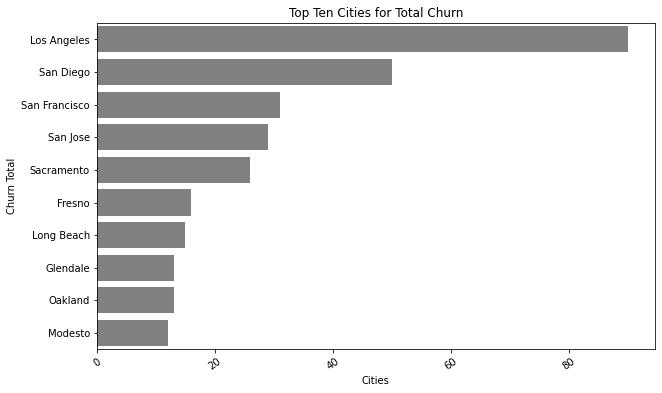

In [85]:
plt.figure(figsize=(10,6))
sns.barplot(y='City', x='Churn Value', data=df_city, color='gray')
plt.xticks(rotation=35)
plt.title('Top Ten Cities for Total Churn')
plt.ylabel('Churn Total')
plt.xlabel('Cities')

plt.savefig('images/City_Churn_total.png')

It is clear that Los Angeles has a higher amount of churn compared to the other cities listed, with San Diego being roughly half as much churn, despite being the second highest. We don't know, however, what percentage of customers churn from each area, which may help us determine the areas that are most concerning.

In [86]:
df_city = df_churn.groupby("City")[['City', 'Churn Value']].agg({'City':'count', 'Churn Value':'sum'})
df_city.rename(columns={'City':'City Count'}, inplace=True)

In [87]:
df_city['Percentage Churn'] = df_city['Churn Value'] / df_city['City Count']

df_city[(df_city['Percentage Churn'] == 1.0) & (df_city['City Count']>0)]

,City Count,Churn Value,Percentage Churn
City,,,
Boulder Creek,4,4,1.0
Eldridge,4,4,1.0
Fort Jones,4,4,1.0
Johannesburg,4,4,1.0
Maricopa,4,4,1.0
Riverbank,4,4,1.0
Smith River,4,4,1.0
South Lake Tahoe,4,4,1.0
Tipton,4,4,1.0


We see several cities with only 4 customers all saw their entire set of customers churn. While this is worth looking into, we would also like to see what larger cities are churning at higher rates to get an idea of where to focus our questions for limiting customer churn.

In [88]:
df_city_churn = df_city[(df_city['City Count']>20)].sort_values('Percentage Churn', ascending=False).head(10)
df_city_churn.reset_index(inplace=True)

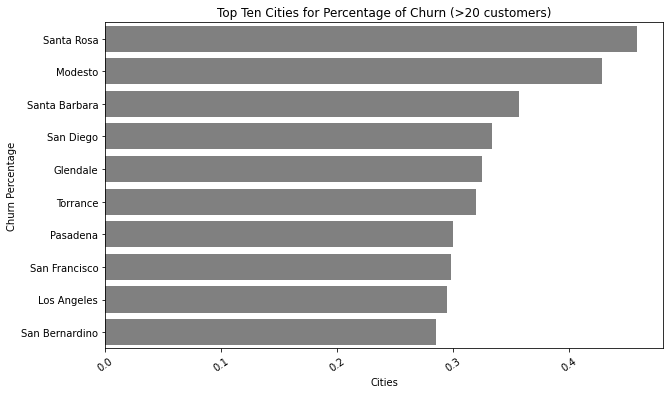

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(y='City', x='Percentage Churn', data=df_city_churn, color='gray')
plt.xticks(rotation=35)
plt.title('Top Ten Cities for Percentage of Churn (>20 customers)')
plt.ylabel('Churn Percentage')
plt.xlabel('Cities')

plt.savefig('images/Cities_Churn_perc.png')

Some observations from the two plots we have shown:

* This plot shows that cities such as Los Angeles, San Francisco, and San Diego all see around 30% churn of customers, while also having higher overall populations. 

* Santa Rosa and Modesto both have very high percentages of churn among customers, with Modesto coming in 10th of overall churn as well.

* We also see that San Jose does not appear in the top 10 for percentage of customer churn, but is 4th in overall churn.

#### Analysis of services vs churn

In [90]:
df_churn.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

We see that there are several services to consider for customer churn. We will now plot the total number of customers that churned based on the services in their plans.

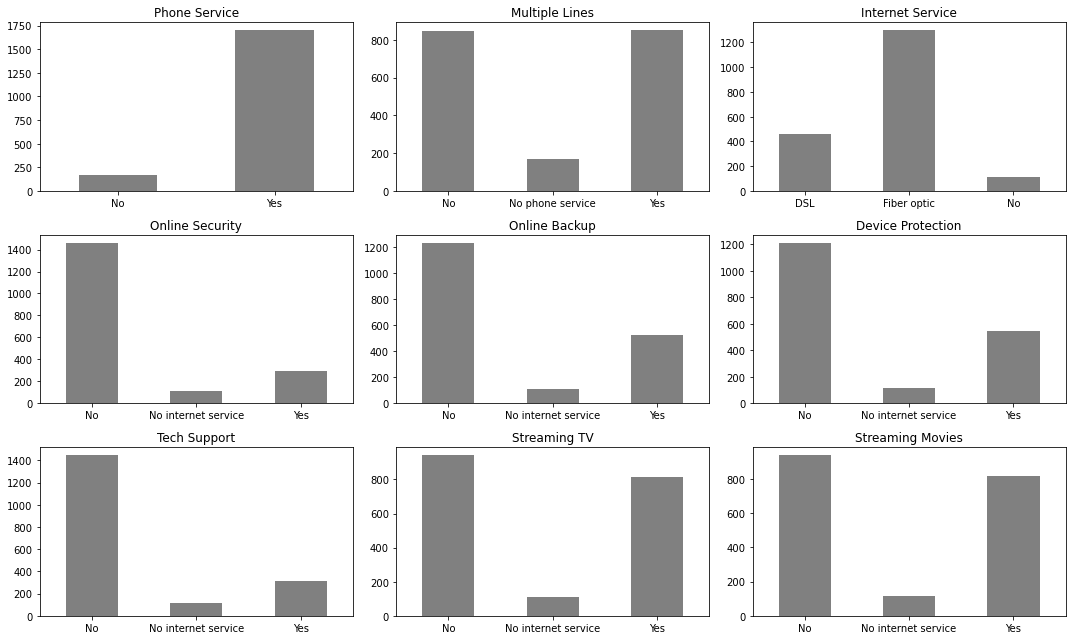

In [136]:
services = ['Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies']
fig = plt.figure(figsize=(15,9))
num = 1
for s in services:
    temp = df_churn.groupby(s)['Churn Value'].sum()
    ax = fig.add_subplot(3,3,num)
    temp.plot(kind='bar', color='gray')
    plt.xticks(rotation='horizontal')
    plt.xlabel('')
    plt.title(str(s))
    num +=1
plt.tight_layout()
plt.show()

Observations from the initial look into the services:
* Customers with Phone Services account for a significant number of the customers that churned, at almost 1750!
* Customers with Fiber Optics are more abundant than those that have DSL or no internet
* For those that have an internet services, a lack of services such as Online Security, Online Backup, Device Protection, and Tech support account for the larger number of churned customers than those with these services.
* There is a nearly equal number of Streaming TV and Movie customers that churn vs those without.
* The customers with no internet service account for a very small churn population in comparison to those with internet.

Suppose instead we would rather see what the total churn per service is in comparison to the population with each service. Below, we see the graphs as such that show what percentage of each service churned in comparison to who has that service.

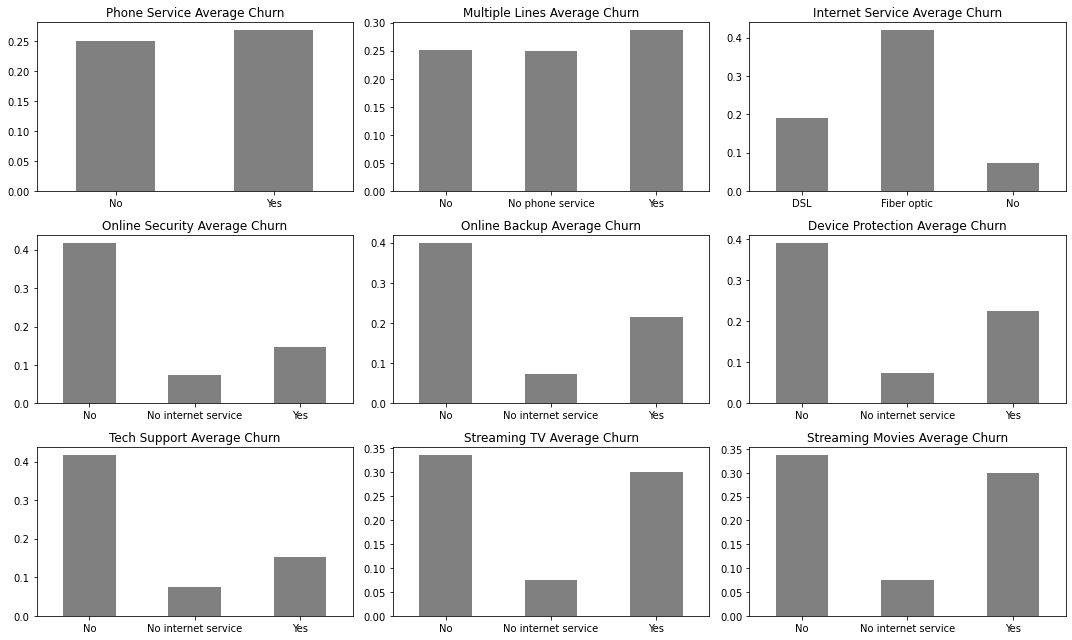

In [147]:
fig = plt.figure(figsize=(15,9))
num = 1
for s in services:
    temp = df_churn.groupby(s)['Churn Value'].sum() / df_churn.groupby(s)[s].count()
    ax = fig.add_subplot(3,3,num)
    temp.plot(kind='bar', color='gray')
    plt.xticks(rotation='horizontal')
    plt.xlabel('')
    plt.title(str(s) + ' Average Churn')
    num +=1
plt.tight_layout()
plt.show()

Observations when taking into account the percentage of churn per service:
* Phone service churn is almost identical with regards to the percentages of churn from customers with and without phone services, as well as with multiple lines
* **Fiber optics customers churn at nearly 40%, compared to DSL which is below 20%**
* As we saw in the previous plots, customers who lack services tend to churn more frequently.
* Customers with streaming are churning at nearly the same rate as those without.

We can see that there is a significant churn rate increase with fiber optics customers. It would follow that there must be some reason, such as competitor offers or service quality that causes this discrepancy.

#### Analysis based on churn reasons

Text(0.5, 1.0, 'Total Churn based on reasons for churn')

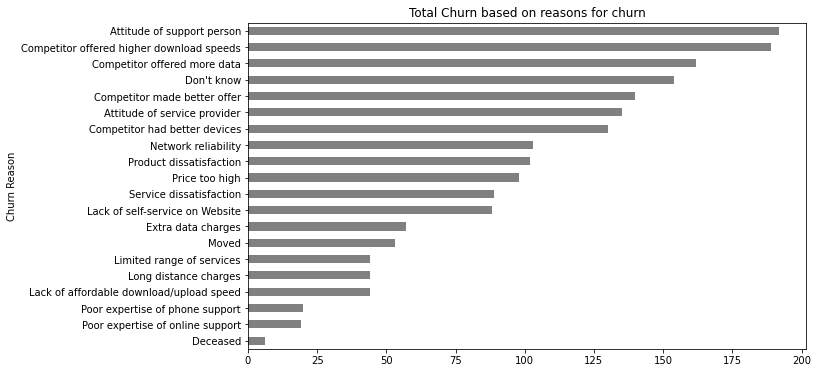

In [155]:
temp = df_churn.groupby('Churn Reason')['Churn Reason'].count().sort_values()
plt.figure(figsize=(10,6))
temp.plot(kind='barh',color='gray')
plt.title("Total Churn based on reasons for churn")

It seems that there are two main reasons for the majority of the churn:
* Competitor offers
* Attitude of the support personelle

The first reason makes sense, as we noted before that customers with fiber optics were nearly twice as likely to churn as opposed to those with DSL. The competitor offers must have targeted these customers, resulting in the differences.

As for the attitude of support, it could account for the larger portion of churn for customers with fewer services. This means that they had to use a different route for troubleshooting issues, which may not be as good as the assistance provided with the Tech support or Device Protection services, for example. Without those services, customers would be forced to call for help and would likely deal with the nightmares of call center run arounds and long wait times.

In our next notebook, we will preprocess the data and create our training and test sets. Then we will create our models and explore their effectiveness in categorizing whether customers churn or not.